In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set_style("whitegrid")


# Section 1: Data Overview and Preparation

### 1.1 DATA OVERVIEW

In [2]:
# 0. Load Data
# Load dataset (adjust the filename accordingly)
df = pd.read_csv("kip_sdm_syn.csv", delimiter=",")  # If the delimiter is different, adjust accordingly

# Check dataset size (number of rows and columns)
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

# Check column names, data types, and missing values
df.info()


Number of rows: 40000
Number of columns: 45
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 45 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   fallen                                            40000 non-null  bool   
 1   id                                                40000 non-null  int64  
 2   age                                               40000 non-null  int64  
 3   procedure                                         40000 non-null  object 
 4   diagnosis                                         40000 non-null  object 
 5   c_zriserh1                                        40000 non-null  bool   
 6   decubitus-admission                               9399 non-null   object 
 7   decubitus-at_the_moment                           9599 non-null   object 
 8   bed_mobility-impairment                           11

In [3]:
#from IPython.display import display

#display(df.style.set_sticky())  # Keeps headers fixed while scrolling


In [4]:
#from ydata_profiling import ProfileReport

#profile = ProfileReport(df, title="Dataset Report", explorative=True)
#profile.to_widgets()  # Display report in Jupyter


📊 Verteilung der Zielvariable 'fallen':
        Anzahl  Prozent
fallen                 
False    39905    99.76
True        95     0.24


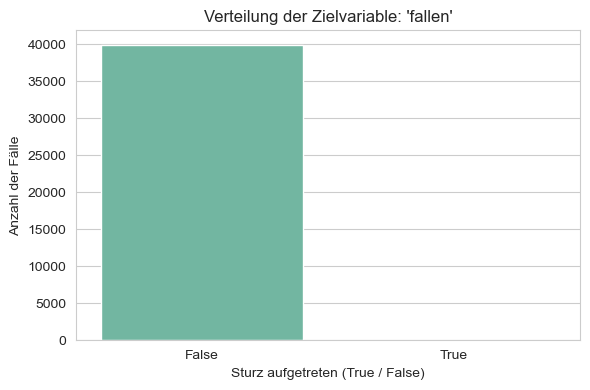

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Absolute Häufigkeiten
fall_counts = df["fallen"].value_counts(dropna=False)

# Relative Häufigkeiten in %
fall_percent = df["fallen"].value_counts(normalize=True, dropna=False) * 100

# Tabelle anzeigen
fall_summary = pd.DataFrame({
    "Anzahl": fall_counts,
    "Prozent": fall_percent.round(2)
})

print("📊 Verteilung der Zielvariable 'fallen':")
print(fall_summary)

# Balkendiagramm
# Balkendiagramm ohne FutureWarning
plt.figure(figsize=(6, 4))
sns.barplot(
    x=fall_counts.index.astype(str),
    y=fall_counts.values,
    hue=fall_counts.index.astype(str),  # Dummy Hue
    palette="Set2",
    legend=False
)
plt.title("Verteilung der Zielvariable: 'fallen'")
plt.xlabel("Sturz aufgetreten (True / False)")
plt.ylabel("Anzahl der Fälle")
plt.tight_layout()
plt.grid(True, axis='y')
plt.show()

# -> Highly imbalanced target variable will need special Sampling.


C:\Users\cljxx\AppData\Local\Temp\ipykernel_13524\2988283052.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_table.iloc[:20, 0], y=missing_table.iloc[:20].index, palette="viridis")


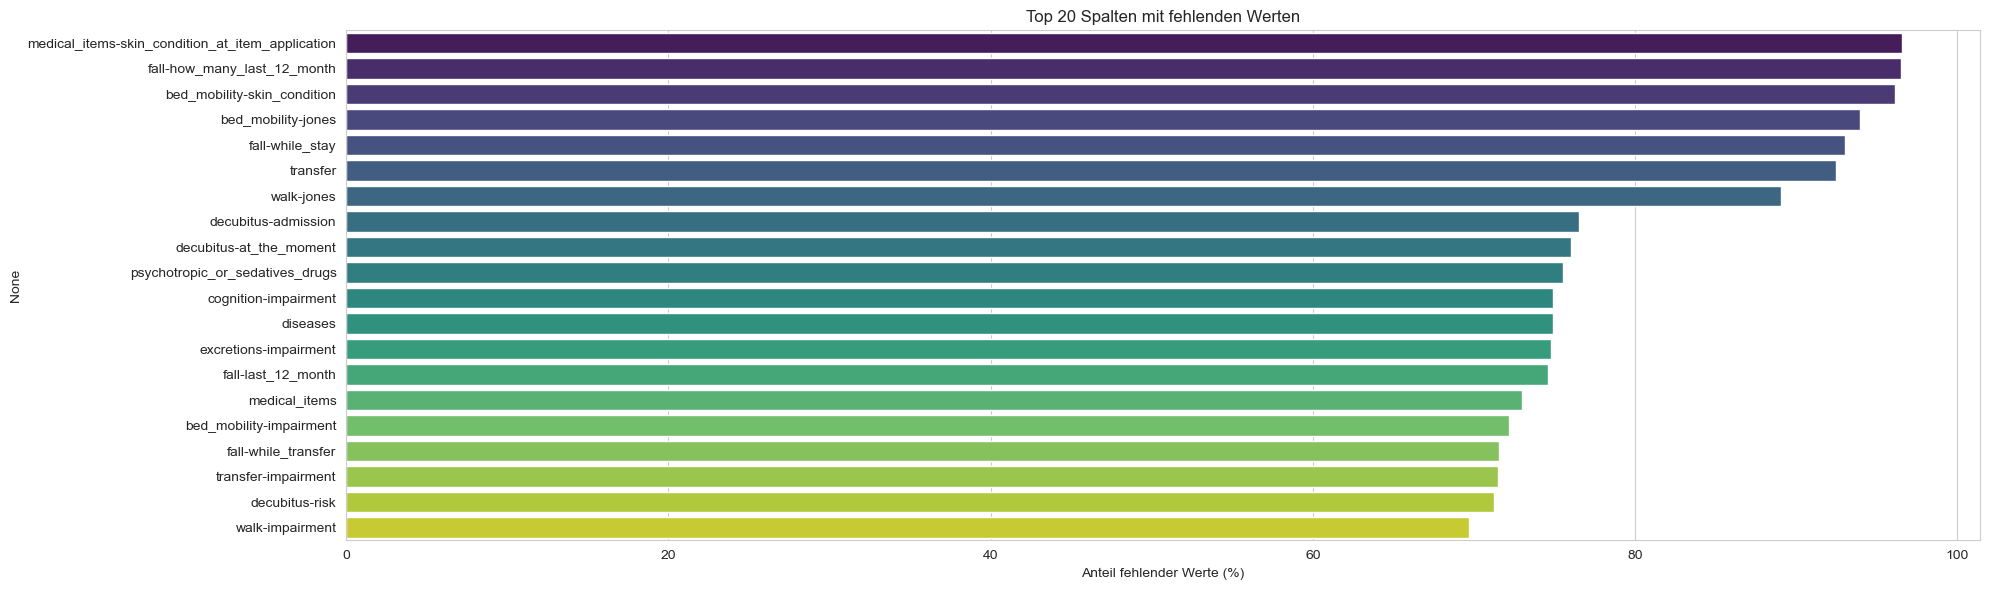

,Missing (%)
medical_items-skin_condition_at_item_application,96.5925
fall-how_many_last_12_month,96.5000
bed_mobility-skin_condition,96.1175
bed_mobility-jones,93.9825
fall-while_stay,93.0300
transfer,92.4850
walk-jones,89.0675
decubitus-admission,76.5025
decubitus-at_the_moment,76.0025
psychotropic_or_sedatives_drugs,75.5075


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Fehlende Werte pro Spalte in Prozent
missing_percent = df.isnull().mean().sort_values(ascending=False) * 100
missing_table = missing_percent[missing_percent > 0].to_frame(name="Missing (%)")

# Balkendiagramm der Top 20 Spalten mit fehlenden Werten
plt.figure(figsize=(20, 6))
sns.barplot(x=missing_table.iloc[:20, 0], y=missing_table.iloc[:20].index, palette="viridis")
plt.xlabel("Anteil fehlender Werte (%)")
plt.title("Top 20 Spalten mit fehlenden Werten")
plt.tight_layout()
plt.grid(True, axis='x')
plt.show()

# Tabelle optional anzeigen
display(missing_table)

In [7]:
 # 2. Flag Missing Data

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Stil für Diagramme
sns.set_style("whitegrid")

# Zielspalten laut deiner Analyse
columns_to_check = [
    "fall-how_many_last_12_month",
    "bed_mobility-jones",
    "walk-jones",
    "decubitus-risk",
    "fall-risk"
]

# Analyse-Schleife
for col in columns_to_check:
    print(f"\n📊 Übersicht für Spalte: {col}")
    print("-" * 50)
    
    # Fehlende Werte
    missing_pct = df[col].isna().mean() * 100
    print(f"🔹 Fehlende Werte: {missing_pct:.2f} %")

    # Anzahl eindeutiger Werte inkl. NaN
    unique_vals = df[col].nunique(dropna=False)
    print(f"🔹 Anzahl unterschiedlicher Werte (inkl. NaN): {unique_vals}")

    # Verteilung (inkl. NaN)
    print("\n🔸 Wertverteilung:")
    print(df[col].value_counts(dropna=False))

    # Visualisierung für kategoriale Merkmale
   # Visualisierung für kategoriale Merkmale (warnungsfrei)
if df[col].dtype.name == "category":
    plt.figure(figsize=(6, 3))
    sns.countplot(
        data=df,
        y=col,
        order=df[col].value_counts().index,
        hue=col,                  # dummy hue notwendig für palette
        palette="viridis",
        legend=False              # keine doppelte Legende nötig
    )
    plt.title(f"Wertverteilung: {col}")
    plt.xlabel("Anzahl")
    plt.tight_layout()
    plt.show()


📊 Übersicht für Spalte: fall-how_many_last_12_month
--------------------------------------------------
🔹 Fehlende Werte: 96.50 %
🔹 Anzahl unterschiedlicher Werte (inkl. NaN): 20

🔸 Wertverteilung:
fall-how_many_last_12_month
NaN         38600
1.000000     1122
5.000000      249
3.000000       11
2.000000        3
3.392226        1
2.748724        1
4.931584        1
3.100813        1
3.871862        1
3.659762        1
2.981188        1
1.257659        1
3.241220        1
4.396037        1
4.096168        1
2.013521        1
2.202339        1
4.453497        1
4.175363        1
Name: count, dtype: int64

📊 Übersicht für Spalte: bed_mobility-jones
--------------------------------------------------
🔹 Fehlende Werte: 93.98 %
🔹 Anzahl unterschiedlicher Werte (inkl. NaN): 6

🔸 Wertverteilung:
bed_mobility-jones
NaN    37593
2       1678
3        496
4A       139
1         89
4B         5
Name: count, dtype: int64

📊 Übersicht für Spalte: walk-jones
-----------------------------------------

In [8]:
#import sweetviz as sv

# Generate a Sweetviz report
#report = sv.analyze(df)

# Display the report in the notebook
#report.show_html("sweetviz_report.html")


In [9]:
# Crosstab mit relativen Häufigkeiten (Zeilenprozent)
def show_crosstab(col):
    print(f"\n📊 Verteilung von 'fallen' je Kategorie in: {col}")
    ct = pd.crosstab(df[col], df["fallen"], normalize="index") * 100
    display(ct.round(2))

# Analyse für ausgewählte kategoriale Merkmale
for cat_col in ["fall-risk", "decubitus-risk", "walk-jones", "bed_mobility-jones"]:
    if cat_col in df.columns:
        show_crosstab(cat_col)



📊 Verteilung von 'fallen' je Kategorie in: fall-risk


fallen,False,True
fall-risk,,
+,97.42,2.58
++,100.00,0.00
0,100.00,0.00



📊 Verteilung von 'fallen' je Kategorie in: decubitus-risk


fallen,False,True
decubitus-risk,,
+,97.77,2.23
++,97.70,2.30
0,99.90,0.10



📊 Verteilung von 'fallen' je Kategorie in: walk-jones


fallen,False,True
walk-jones,,
1,93.61,6.39
2,99.90,0.10
3,97.54,2.46
4A,95.88,4.12
4B,95.89,4.11



📊 Verteilung von 'fallen' je Kategorie in: bed_mobility-jones


fallen,False,True
bed_mobility-jones,,
1,93.26,6.74
2,99.88,0.12
3,96.98,3.02
4A,95.68,4.32
4B,100.00,0.00


### 1.2 DATA PREPARATION

In [10]:
# 1. Change Data types (the reasoning must be documented)

import pandas as pd
import numpy as np

# Konvertierung von String zu Boolean (inkl. leere Zellen)
def to_boolean(val):
    if pd.isna(val) or str(val).strip() == "":
        return pd.NA
    val = str(val).strip().lower()
    if val == "true":
        return True
    elif val == "false":
        return False
    else:
        return pd.NA

# Typ-Mapping laut Aufgabenstellung
type_mapping = {
    'procedure': 'category',
    'diagnosis': 'category',
    'decubitus-admission': 'bool',
    'decubitus-at_the_moment': 'bool',
    'bed_mobility-impairment': 'bool',
    'bed_mobility-jones': 'category',
    'bed_mobility-skin_condition': 'bool',
    'transfer-impairment': 'bool',
    'transfer': 'category',
    'medical_items': 'bool',
    'medical_items-skin_condition_at_item_application': 'bool',
    'fall-last_12_month': 'bool',
    'fall-how_many_last_12_month': 'int64',
    'fall-while_stay': 'bool',
    'fall-while_transfer': 'bool',
    'walk-impairment': 'bool',
    'walk-jones': 'category',
    'excretions-impairment': 'bool',
    'cognition-impairment': 'bool',
    'psychotropic_or_sedatives_drugs': 'bool',
    'decubitus-risk': 'category',
    'fall-risk': 'category',
    'diseases': 'bool',
    'sex': 'category'
}

# Protokoll für Konvertierungsaktionen
conversion_log = []

#  Typkonvertierung
for col, new_type in type_mapping.items():
    if col in df.columns:
        original_len = len(df)
        try:
            if new_type == 'category':
                df[col] = df[col].astype('category')

            elif new_type == 'bool':
                df[col] = df[col].apply(to_boolean).astype("boolean")

            elif new_type == 'int64':
                df[col] = pd.to_numeric(df[col], errors='coerce')
                non_integer_mask = df[col].dropna().apply(lambda x: not float(x).is_integer())
                non_integer_indices = df[col].dropna()[non_integer_mask].index
                removed = len(non_integer_indices)
                df.drop(index=non_integer_indices, inplace=True)
                df[col] = df[col].astype("Int64")

                if removed > 0:
                    conversion_log.append(
                        f"Spalte '{col}': {removed} Zeilen mit ungültigen (nicht-ganzzahligen) Werten gelöscht."
                    )

            elif new_type == 'float':
                df[col] = pd.to_numeric(df[col], errors='coerce').astype('Float64')

            elif new_type == 'string':
                df[col] = df[col].astype("string")

        except Exception as e:
            conversion_log.append(f"Spalte '{col}': Fehler bei der Umwandlung – {str(e)}")

# ✅ Fehlende Werte in Boolean-Spalten durch False ersetzen
boolean_cols = df.select_dtypes(include="boolean").columns
df[boolean_cols] = df[boolean_cols].fillna(False)

# 🧾 Protokoll ausgeben
print("🧾 Umwandlungsprotokoll:")
for entry in conversion_log:
    print(" -", entry)

# 🧮 Übersicht anzeigen
df.info()


🧾 Umwandlungsprotokoll:
 - Spalte 'fall-how_many_last_12_month': 15 Zeilen mit ungültigen (nicht-ganzzahligen) Werten gelöscht.
<class 'pandas.core.frame.DataFrame'>
Index: 39985 entries, 0 to 39999
Data columns (total 45 columns):
 #   Column                                            Non-Null Count  Dtype   
---  ------                                            --------------  -----   
 0   fallen                                            39985 non-null  bool    
 1   id                                                39985 non-null  int64   
 2   age                                               39985 non-null  int64   
 3   procedure                                         39985 non-null  category
 4   diagnosis                                         39985 non-null  category
 5   c_zriserh1                                        39985 non-null  bool    
 6   decubitus-admission                               39985 non-null  boolean 
 7   decubitus-at_the_moment                    

In [11]:
# 1. Numerisch: NaN mit 0 ersetzen
# Neue Spalte: Angabe vorhanden oder nicht
df["fall-how_many_last_12_month_present"] = df["fall-how_many_last_12_month"].notna()

# NaNs durch 0 ersetzen
df["fall-how_many_last_12_month"] = df["fall-how_many_last_12_month"].fillna(0).astype("int64")

# 2. Kategorisch: NaN mit "unknown" ersetzen
columns_to_fill_unknown = [
    "bed_mobility-jones",
    "walk-jones",
    "decubitus-risk",
    "fall-risk"
]
columns_to_fill_0 = ["transfer"]

for col in columns_to_fill_unknown:
    df[col] = df[col].cat.add_categories("unknown")  # Kategorie "unknown" hinzufügen
    df[col] = df[col].fillna("unknown")              # NaN ersetzen

for col in columns_to_fill_0:
    df[col] = df[col].cat.add_categories(0)
    df[col] = df[col].fillna(0)              # NaN ersetzen


Die ordinalen Merkmale fall-risk, decubitus-risk, walk-jones und bed_mobility-jones wurden anhand einer logisch definierten Skala in numerische Werte umgewandelt.



In [12]:
# 🧠 Ziel: Ordinale Features mit Mapping umwandeln, dabei unbekannte Werte ("unknown" oder ungemappte Werte) als -1 behandeln

ordinal_mappings = {
    "fall-risk": {
        "unknown": 0,
        "0": 0,
        "+": 1,
        "++": 2
    },
    "decubitus-risk": {
        "unknown": 0,
        "0": 0,
        "+": 1,
        "++": 2
    },
    "walk-jones": {
        "unknown": 1,
        "1": 1,
        "2": 2,
        "3": 3,
        "4A": 4
    },
    "bed_mobility-jones": {
        "unknown": 1,
        "1": 1,
        "2": 2,
        "3": 3,
        "4A": 4
    },
    "transfer": 
        "unknown" : 0,
        "0": 0,
        "1": 1,
        "2": 2,
        "3": 3,
        "4A": 4,
        "4B": 4.5
    }
}

# ✅ Mapping mit Fehlervermeidung durch fillna(-1)
for col, mapping in ordinal_mappings.items():
    print(f"🔁 Mapping Spalte '{col}' mit: {mapping}")
    df[col] = df[col].map(mapping).fillna(0).astype("int64")
    print(f"✅ '{col}' erfolgreich konvertiert: dtype = {df[col].dtype}\n")


🔁 Mapping Spalte 'fall-risk' mit: {'unknown': 0, '0': 0, '+': 1, '++': 2}
✅ 'fall-risk' erfolgreich konvertiert: dtype = int64

🔁 Mapping Spalte 'decubitus-risk' mit: {'unknown': 0, '0': 0, '+': 1, '++': 2}
✅ 'decubitus-risk' erfolgreich konvertiert: dtype = int64

🔁 Mapping Spalte 'walk-jones' mit: {'unknown': 1, '1': 1, '2': 2, '3': 3, '4A': 4}
✅ 'walk-jones' erfolgreich konvertiert: dtype = int64

🔁 Mapping Spalte 'bed_mobility-jones' mit: {'unknown': 1, '1': 1, '2': 2, '3': 3, '4A': 4}
✅ 'bed_mobility-jones' erfolgreich konvertiert: dtype = int64

🔁 Mapping Spalte 'transfer' mit: {'0': 0, '1': 1, '2': 2, '3': 3, '4A': 4, '4B': 4.5}
✅ 'transfer' erfolgreich konvertiert: dtype = int64



In [13]:
# Prüfen und entfernen, wenn nur False enthalten ist
if "decubitus-admission" in df.columns:
    if df["decubitus-admission"].nunique(dropna=False) == 1 and df["decubitus-admission"].unique()[0] == False:
        df.drop(columns="decubitus-admission", inplace=True)
        print("🗑️ Spalte 'decubitus-admission' wurde entfernt (enthielt nur False).")


🗑️ Spalte 'decubitus-admission' wurde entfernt (enthielt nur False).


In [14]:
if "medical_items-A_V_system" in df.columns:
    if df["medical_items-A_V_system"].nunique(dropna=False) == 1 and df["medical_items-A_V_system"].unique()[0] == False:
        df.drop(columns="medical_items-A_V_system", inplace=True)
        print("🗑️ Spalte 'medical_items-A_V_system' wurde entfernt (enthielt nur False).")

🗑️ Spalte 'medical_items-A_V_system' wurde entfernt (enthielt nur False).


In [15]:
# Entfernen der ID-Spalte, da sie keine nützliche Information enthält
if "id" in df.columns:
    df.drop(columns="id", inplace=True)
    print("🗑️ Spalte 'id' wurde entfernt (nur Identifikator, keine Modellrelevanz).")


🗑️ Spalte 'id' wurde entfernt (nur Identifikator, keine Modellrelevanz).


In [16]:
import pandas as pd

# Kategoriale Spalten auswählen
cat_cols = df.select_dtypes(include=['object', 'category']).columns

# Varianz berechnen: Varianz der relativen Häufigkeiten
def categorical_variance(series):
    freqs = series.value_counts(normalize=True)
    return freqs.var()

# Für jede Spalte berechnen
cat_var = {col: categorical_variance(df[col]) for col in cat_cols}

# Ausgabe als DataFrame
var_df = pd.DataFrame.from_dict(cat_var, orient='index', columns=['Varianz']).sort_values(by='Varianz', ascending=False)
print(var_df)


                Varianz
sex        2.342747e-03
procedure  9.423840e-04
diagnosis  3.135462e-07


C:\Users\cljxx\AppData\Local\Temp\ipykernel_13524\3527046909.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=group_fallrate.values, y=group_fallrate.index, palette="coolwarm")
C:\Users\cljxx\AppData\Local\Temp\ipykernel_13524\3527046909.py:16: UserWarning: Glyph 127973 (\N{HOSPITAL}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\cljxx\anaconda3\envs\aa_tuesday\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127973 (\N{HOSPITAL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


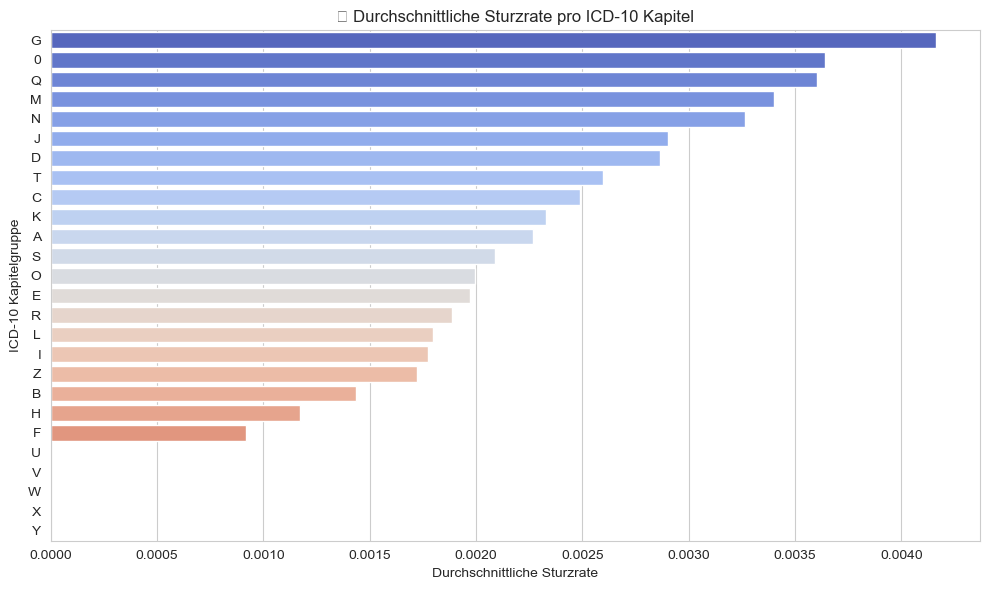

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# 🧾 ICD-10 Kapitelgruppierung (nur erstes Zeichen)
df["diagnosis_group"] = df["diagnosis"].astype(str).str[0]

# 📊 Sturzrate pro Gruppe berechnen
group_fallrate = df.groupby("diagnosis_group")["fallen"].mean().sort_values(ascending=False)

# 📈 Visualisieren
plt.figure(figsize=(10, 6))
sns.barplot(x=group_fallrate.values, y=group_fallrate.index, palette="coolwarm")
plt.xlabel("Durchschnittliche Sturzrate")
plt.ylabel("ICD-10 Kapitelgruppe")
plt.title("🏥 Durchschnittliche Sturzrate pro ICD-10 Kapitel")
plt.tight_layout()
plt.show()

diagnosis hat eine extrem hohe Varianz, daher entfernen

In [18]:
df = df.drop(columns=['diagnosis'])
print("🗑️ Spalte 'diagnosis' wurde entfernt (sehr hohe Varianz).")

🗑️ Spalte 'diagnosis' wurde entfernt (sehr hohe Varianz).


In [19]:
# import sweetviz as sv

# # Generate a Sweetviz report
# report = sv.analyze(df, target_feat="fallen")

# # Display the report in the notebook
# report.show_html("sweetviz_report.html")


### 1.3 OUTLIER HANDLING

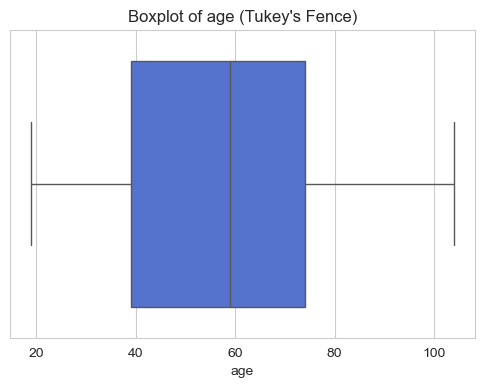

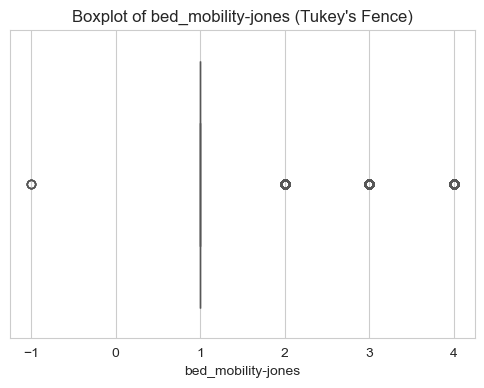

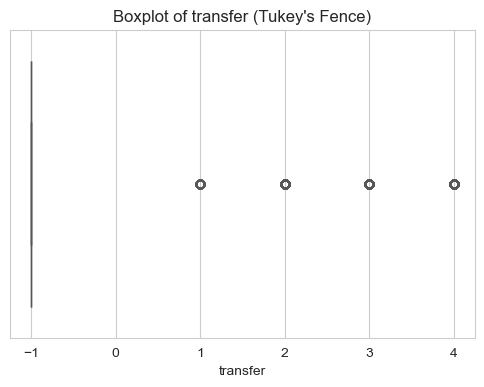

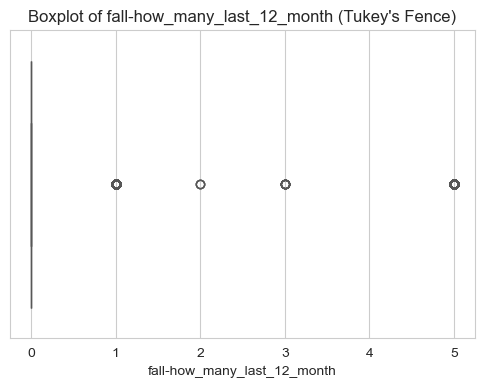

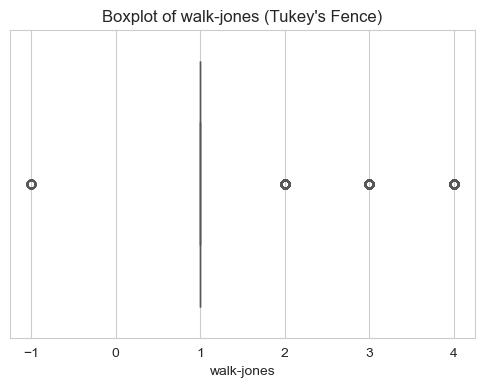

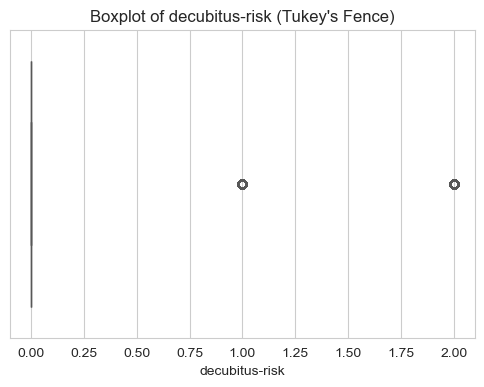

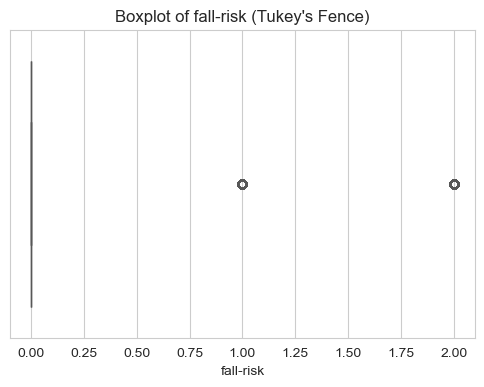

In [20]:
# outliers erkennen

# Nur numerische Spalten analysieren
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns


import matplotlib.pyplot as plt
import seaborn as sns

for col in numeric_cols:
    col_data = df[col].dropna()
    
    Q1 = col_data.quantile(0.25)
    Q3 = col_data.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers_tukey = (col_data < lower) | (col_data > upper)

    plt.figure(figsize=(6, 4))
    sns.boxplot(x=col_data, color='royalblue')
    plt.xlabel(col)
    plt.title(f"Boxplot of {col} (Tukey's Fence)")
    plt.show()

Durch unsere Imputation haben wir extreme Gewichtungen auf die -1 Werte gelegt. Dadurch werden nun alle oder fast alle anderen Werte als Outlier angezeigt. Um dennoch diese Daten als Anhaltspunkte für die Vorhersage nicht auszuschließen, behalten wir sie drin.

In [21]:
# multivariant imputation ?

### 1.4 TRAIN TEST SPLIT

Da ein unausgewogenes Target (fallen):
Verwenden eines stratifizierten Split, um sicherzustellen, dass die Verteilung von fallen in train und test ähnlich ist.



In [22]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

# 🎯 Zielvariable
target = "fallen"

# 📦 Features und Target aufteilen
X = df.drop(columns=target)
y = df[target]

# ✂️ Stratified Split: 80% Train, 20% Test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# 🔎 Verteilungen vor dem Oversampling überprüfen
print("📊 Verteilung im gesamten Datensatz:")
print(y.value_counts(normalize=True) * 100)

print("\n📊 Verteilung im Trainingsset (vor Oversampling):")
print(y_train.value_counts(normalize=True) * 100)

print("\n📊 Verteilung im Testset:")
print(y_test.value_counts(normalize=True) * 100)

# 🔄 Oversampling (nur auf Trainingsdaten!)
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# ✅ Ergebnis nach Oversampling
print("\n✅ Verteilung im Trainingsset (nach Oversampling):")
print(y_train_resampled.value_counts(normalize=True) * 100)


📊 Verteilung im gesamten Datensatz:
fallen
False    99.764912
True      0.235088
Name: proportion, dtype: float64

📊 Verteilung im Trainingsset (vor Oversampling):
fallen
False    99.765537
True      0.234463
Name: proportion, dtype: float64

📊 Verteilung im Testset:
fallen
False    99.762411
True      0.237589
Name: proportion, dtype: float64

✅ Verteilung im Trainingsset (nach Oversampling):
fallen
False    50.0
True     50.0
Name: proportion, dtype: float64


# Section 2: Data Exploration and Relationships

### 2.1 ANALYZE DATA

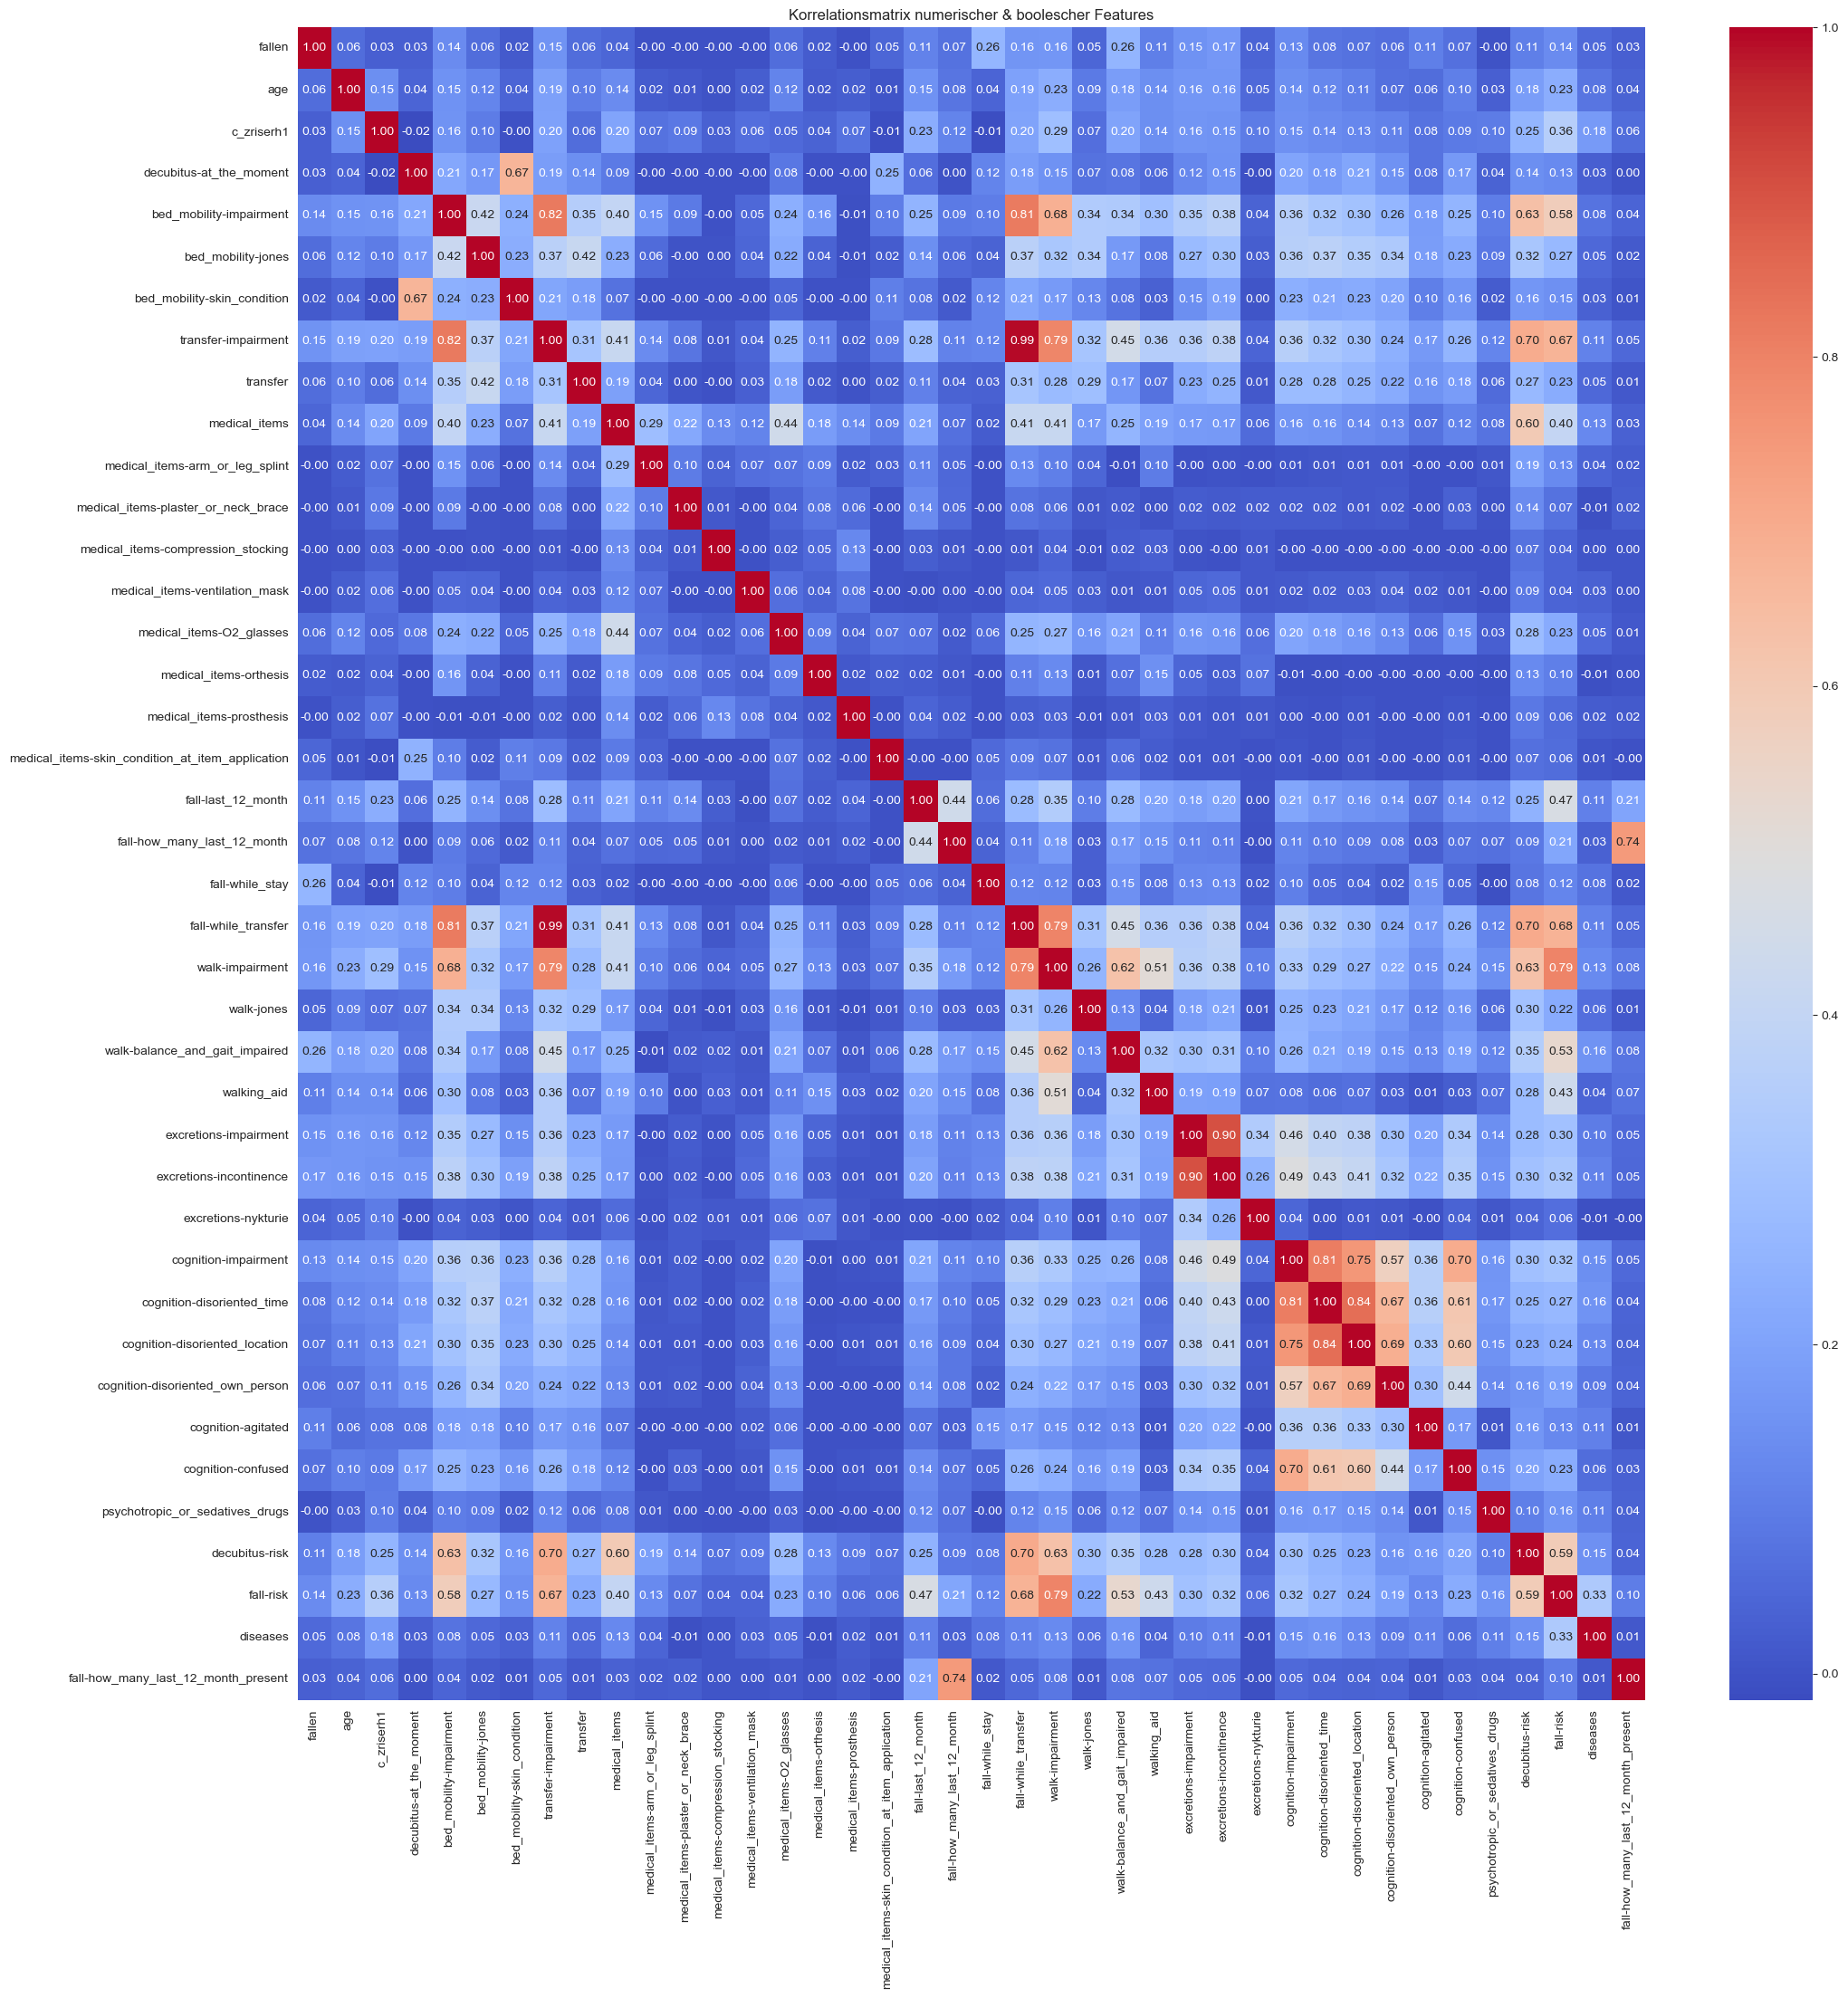

Korrelation mit 'fallen':
fall-while_stay                                     0.259268
walk-balance_and_gait_impaired                      0.255315
excretions-incontinence                             0.167692
walk-impairment                                     0.163476
fall-while_transfer                                 0.159998
transfer-impairment                                 0.154560
excretions-impairment                               0.151549
fall-risk                                           0.137093
bed_mobility-impairment                             0.135701
cognition-impairment                                0.132753
fall-last_12_month                                  0.111641
decubitus-risk                                      0.106653
cognition-agitated                                  0.106055
walking_aid                                         0.105638
cognition-disoriented_time                          0.079942
fall-how_many_last_12_month                         0.07165

In [23]:
# Zielvariable und Bool-Spalten in numerisch umwandeln
df_corr = df.copy()
df_corr['fallen'] = df_corr['fallen'].astype(int)
for col in df_corr.select_dtypes(include='bool').columns:
    df_corr[col] = df_corr[col].astype(int)

# Alle numerischen Spalten (inkl. ehemals bool) auswählen
numeric_cols = df_corr.select_dtypes(include='number').columns.tolist()
corr_matrix = df_corr[numeric_cols].corr()

# Heatmap der Korrelationen
n = len(numeric_cols)
plt.figure(figsize=(max(12, n * 0.6), max(8, n * 0.6)))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Korrelationsmatrix numerischer & boolescher Features")
plt.show()

# Korrelation mit Zielvariable
target_corr = corr_matrix['fallen'].drop('fallen').sort_values(key=abs, ascending=False)
print("Korrelation mit 'fallen':")
print(target_corr)


In [24]:
# 🔎 Schritt 1: Fallrate pro Procedure-Kategorie berechnen
procedure_fall_rate = df.groupby("procedure")["fallen"].mean()

# 🧾 Optional: Ausgabe der Top/Bottom Prozeduren
print("📈 Prozeduren mit höchster Fallrate:")
print(procedure_fall_rate.sort_values(ascending=False).head())

print("\n📉 Prozeduren mit niedrigster Fallrate:")
print(procedure_fall_rate.sort_values().head())

# 📌 Schritt 2: Neues numerisches Feature erstellen (Fallrate wird gemappt)
#df["procedure_fallrate"] = df["procedure"].map(procedure_fall_rate)

# 🧼 Schritt 3: Originalspalte 'procedure' entfernen, falls nicht mehr gebraucht
#df = df.drop(columns="procedure")

# ✅ Ergebnis prüfen
print("\n✅ Neues Feature 'procedure_fallrate' erstellt – Beispielwerte:")
#print(df[["procedure_fallrate", "fallen"]].head())

📈 Prozeduren mit höchster Fallrate:
procedure
3-22    0.048387
1-85    0.036364
5-65    0.035714
5-80    0.030303
5-90    0.028169
Name: fallen, dtype: float64

📉 Prozeduren mit niedrigster Fallrate:
procedure
0       0.0
5-56    0.0
5-58    0.0
5-59    0.0
5-61    0.0
Name: fallen, dtype: float64

✅ Neues Feature 'procedure_fallrate' erstellt – Beispielwerte:


C:\Users\cljxx\AppData\Local\Temp\ipykernel_13524\1227652548.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  procedure_fall_rate = df.groupby("procedure")["fallen"].mean()


In [25]:
# Neue Spalte: True, wenn Transfer "unknown", sonst False
# df["transfer_unknown"] = df["transfer"].astype(str).str.lower() == "unknown"


In [26]:
# 📦 Import falls noch nicht erfolgt
# import pandas as pd

# # 1️⃣ Optional: Fallrate pro Diagnose berechnen (zum Explorieren, nicht zwingend notwendig für die Reduktion)
# fallrate_by_diag = df.groupby("diagnosis", observed=False)["fallen"].mean().sort_values(ascending=False)
# print("📊 Diagnosen mit höchster Fallrate:")
# print(fallrate_by_diag.head())

# 2️⃣ Die häufigsten Diagnosen (Top-N) behalten – alle anderen als 'other' gruppieren
# top_n = 20  # oder 30, je nach Bedarf
# top_diag = df["diagnosis"].value_counts().nlargest(top_n).index

# # 3️⃣ Diagnose-Spalte in Kategorie umwandeln (falls noch nicht)
# df["diagnosis"] = df["diagnosis"].astype("category")

# # 4️⃣ Kategorie 'other' hinzufügen, falls sie noch nicht existiert
# # if "other" not in df["diagnosis"].cat.categories:
# df["diagnosis"] = df["diagnosis"].cat.add_categories("other")

# # 5️⃣ Neue Spalte: häufige Diagnosen beibehalten, andere → "other"
# df["diagnosis_reduced"] = df["diagnosis"].where(df["diagnosis"].isin(top_diag), other="other")

# 6️⃣ Optional: Originalspalte löschen, zu hohe Varianz
# df.drop(columns=["diagnosis"], inplace=True)

# 🖼️ Kontrollausgabe
# print("✅ Neue Diagnose-Feature 'diagnosis_reduced' erstellt – Beispiel:")
# print(df[["diagnosis", "diagnosis_reduced"]].head(10))

#print(df['diagnosis_reduced'].value_counts())



In [27]:
# # 📊 Durchschnittliche Sturzrate pro Diagnose berechnen
# fallrate_by_diag = df.groupby("diagnosis")["fallen"].mean()

# # 🧠 Neues numerisches Feature erstellen
# df["diagnosis_fallrate"] = df["diagnosis"].map(fallrate_by_diag)

# # 📌 Kontrollausgabe: Top-Diagnosen nach Fallrate
# print("📈 Diagnosen mit höchster Fallrate:")
# print(fallrate_by_diag.sort_values(ascending=False).head(10))

# # ✅ Beispielausgabe zur Kontrolle
# print("\n✅ Neues Feature 'diagnosis_fallrate' erstellt – Beispiel:")
# display(df[["diagnosis", "diagnosis_fallrate"]].head())


In [28]:
# # 📊 Durchschnittliche Sturzrate pro 'diagnosis_reduced' berechnen
# fallrate_by_diag_reduced = df.groupby("diagnosis")["fallen"].mean()

# # # ➕ Numerisches Feature: mittlere Fallrate pro reduzierte Diagnose
# # df["diagnosis_reduced_fallrate"] = df["diagnosis_reduced"].map(fallrate_by_diag_reduced)

# # # 🖼️ Kontrollausgabe
# print("📈 Durchschnittliche Fallraten pro 'diagnosis':")
# print(fallrate_by_diag_reduced.sort_values(ascending=False))

# # print("\n✅ Beispielwerte:")
# # display(df[["diagnosis", "diagnosis_reduced", "diagnosis_reduced_fallrate"]].head())
# # 

In [29]:
# from scipy.stats import spearmanr

# # 🧪 Spearman-Korrelation berechnen
# corr, p_value = spearmanr(df["diagnosis_reduced_fallrate"], df["fallen"])

# # 📊 Ergebnis anzeigen
# print(f"📈 Spearman-Korrelation: {corr:.4f}")
# print(f"📌 p-Wert: {p_value:.4e}")

# # Interpretation (optional)
# if p_value < 0.05:
#     print("✅ Statistisch signifikante Korrelation (p < 0.05)")
# else:
#     print("⚠️ Keine signifikante Korrelation (p ≥ 0.05)")

# Comment: Korrelation zwischen Fallrate und fallen?  

C:\Users\cljxx\AppData\Local\Temp\ipykernel_13524\4058500559.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='fall-risk', y='age', palette='coolwarm')
C:\Users\cljxx\anaconda3\envs\aa_tuesday\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


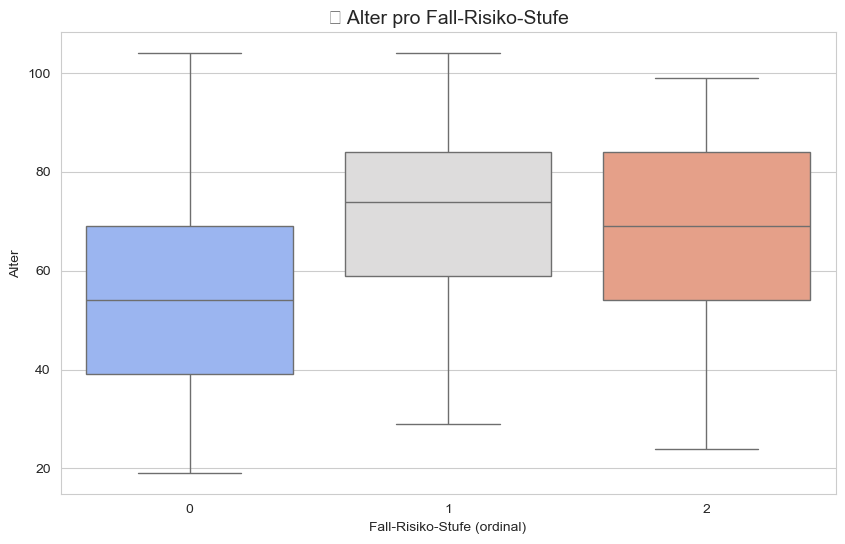

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='fall-risk', y='age', palette='coolwarm')
plt.title("📊 Alter pro Fall-Risiko-Stufe", fontsize=14)
plt.xlabel("Fall-Risiko-Stufe (ordinal)")
plt.ylabel("Alter")
plt.grid(True, axis='y')
plt.show()


In [31]:
# Diagnose-Spalte entfernen (nachdem diagnosis_group abgeleitet wurde)
# df.drop(columns=["diagnosis"], inplace=True)


### 2.2 PREDICTIVE FEATURES (PCA)

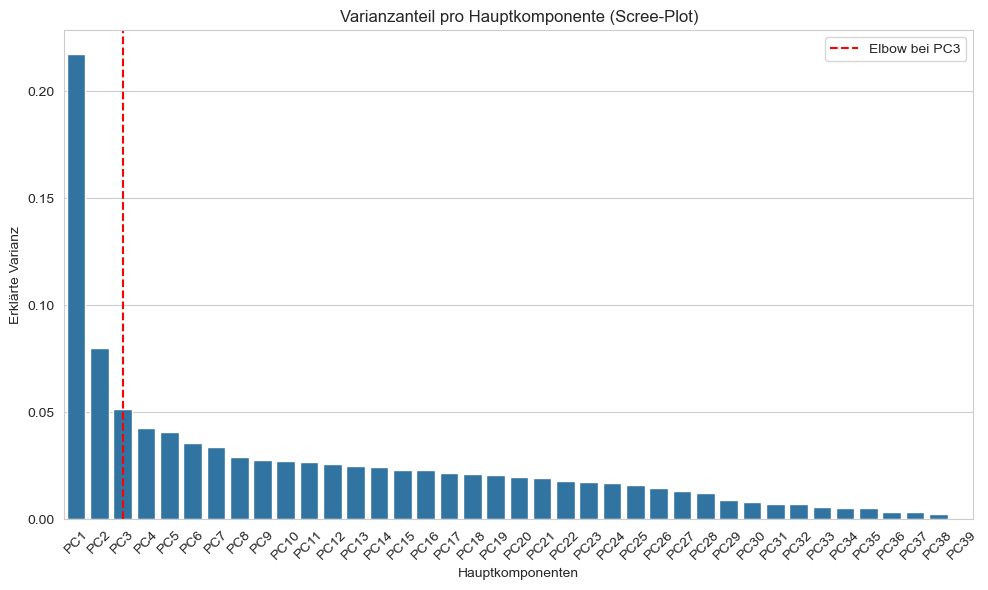

🔹 Elbow gefunden bei Komponente: 3 (Differenzmethode)


In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 1. Datenvorbereitung
df_pca = df.copy()
df_pca['fallen'] = df_pca['fallen'].astype(int)
for col in df_pca.select_dtypes(include='bool').columns:
    df_pca[col] = df_pca[col].astype(int)

target = df_pca['fallen']
features = df_pca.drop(columns=['fallen'])
features = features.select_dtypes(include='number')

# 2. Standardisierung
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# 3. PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
explained_var = pca.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var)

# 4. Differenzmethode: Zuwachs < 1%
first_diff = np.diff(cumulative_var)
threshold = 0.05
elbow_idx = np.argmax(first_diff < threshold) + 1 if any(first_diff < threshold) else None

# 5. Scree-Plot mit Elbow-Point
plt.figure(figsize=(10, 6))
sns.barplot(x=[f"PC{i+1}" for i in range(len(explained_var))], y=explained_var)

if elbow_idx:
    plt.axvline(x=elbow_idx - 1, color='red', linestyle='--', label=f"Elbow bei PC{elbow_idx}")
    plt.legend()

plt.title("Varianzanteil pro Hauptkomponente (Scree-Plot)")
plt.ylabel("Erklärte Varianz")
plt.xlabel("Hauptkomponenten")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 6. Ausgabe des Ergebnisses
print(f"🔹 Elbow gefunden bei Komponente: {elbow_idx if elbow_idx else 'nicht eindeutig'} (Differenzmethode)")


In [33]:
import numpy as np
import pandas as pd

# Komponentenmatrix (n_components x n_features)
loadings = pd.DataFrame(
    pca.components_,
    columns=features.columns,
    index=[f"PC{i+1}" for i in range(pca.n_components_)]
)

# Top-N Features je Komponente
top_n = 5

for pc in loadings.index:
    print(f"\n🔹 {pc} – wichtigste Features:")
    top_features = loadings.loc[pc].abs().sort_values(ascending=False).head(top_n)
    print(top_features)



🔹 PC1 – wichtigste Features:
fall-while_transfer        0.280538
transfer-impairment        0.280482
walk-impairment            0.274862
bed_mobility-impairment    0.263144
fall-risk                  0.254647
Name: PC1, dtype: float64

🔹 PC2 – wichtigste Features:
cognition-disoriented_location      0.349289
cognition-disoriented_time          0.345497
cognition-impairment                0.315753
cognition-disoriented_own_person    0.306196
cognition-confused                  0.282115
Name: PC2, dtype: float64

🔹 PC3 – wichtigste Features:
fall-how_many_last_12_month            0.539891
fall-how_many_last_12_month_present    0.485238
fall-last_12_month                     0.323545
decubitus-at_the_moment                0.217609
bed_mobility-skin_condition            0.209060
Name: PC3, dtype: float64

🔹 PC4 – wichtigste Features:
decubitus-at_the_moment                0.485314
bed_mobility-skin_condition            0.461000
fall-how_many_last_12_month_present    0.321013
fall-how_many

In [34]:
# features speichern und weiter verwenden?

In [35]:
# import sweetviz as sv

# # Generate a Sweetviz report
# report = sv.analyze(df)

# # Display the report in the notebook
# report.show_html("sweetviz_report.html")


                                             |                                                              | …

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Section 3
### 3.1 A simple, interpretable model - Decision Tree

As decision trees as well as SHAP Values can only handle numerical values, we need to transform the data.

In [36]:
from sklearn.preprocessing import LabelEncoder

# Step 2: Handle categorical columns
categorical_columns = df.select_dtypes(include=['category']).columns
print("\nCategorical columns:", categorical_columns)

label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Step 3: Handle object columns
object_columns = df.select_dtypes(include=['object']).columns
print("\nObject columns:", object_columns)

for col in object_columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col].astype(str))

# Step 4: Handle boolean columns
boolean_columns = df.select_dtypes(include=['bool']).columns
print("\nBoolean columns:", boolean_columns)

for col in boolean_columns:
    df[col] = df[col].astype(int)



Categorical columns: Index(['procedure', 'sex'], dtype='object')

Object columns: Index(['diagnosis_group'], dtype='object')

Boolean columns: Index(['fallen', 'c_zriserh1', 'decubitus-at_the_moment',
       'bed_mobility-impairment', 'bed_mobility-skin_condition',
       'transfer-impairment', 'medical_items',
       'medical_items-arm_or_leg_splint',
       'medical_items-plaster_or_neck_brace',
       'medical_items-compression_stocking', 'medical_items-ventilation_mask',
       'medical_items-O2_glasses', 'medical_items-orthesis',
       'medical_items-prosthesis',
       'medical_items-skin_condition_at_item_application',
       'fall-last_12_month', 'fall-while_stay', 'fall-while_transfer',
       'walk-impairment', 'walk-balance_and_gait_impaired', 'walking_aid',
       'excretions-impairment', 'excretions-incontinence',
       'excretions-nykturie', 'cognition-impairment',
       'cognition-disoriented_time', 'cognition-disoriented_location',
       'cognition-disoriented_own_

Fitting 5 folds for each of 80 candidates, totalling 400 fits

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7978
           1       0.12      0.21      0.15        19

    accuracy                           0.99      7997
   macro avg       0.56      0.60      0.57      7997
weighted avg       1.00      0.99      1.00      7997


Best Hyperparameters:
{'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 2}


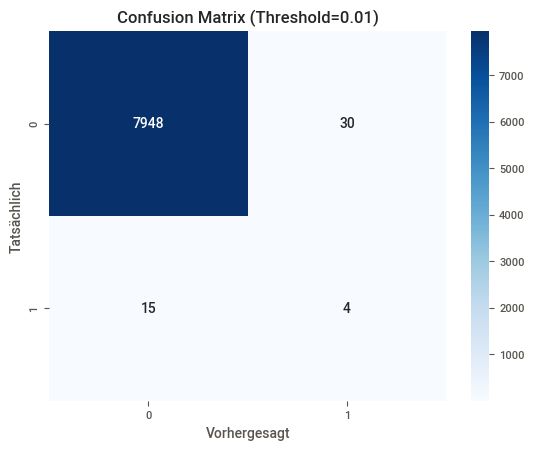

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder


# Step 5: Split the data
# Assuming the target column is named 'fallen'
target = 'fallen'  # Replace with the actual target column name
X = df.drop(columns=[target])
y = df[target]


from imblearn.over_sampling import SMOTE

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train_res, y_train_res = SMOTE(random_state=42).fit_resample(X_train, y_train)


# Step 6: Define hyperparameter grid
param_grid = {
    'max_depth': [5, 10, 15, 20, None],  # Test different tree depths
    'min_samples_split': [2, 5, 10, 20],  # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 5, 10]  # Minimum samples at a leaf node
}

# Step 7: Perform Grid Search with Cross-Validation
clf = DecisionTreeClassifier(class_weight='balanced', random_state=42)
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='f1_macro', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Step 8: Train the best model
best_clf = grid_search.best_estimator_

y_proba = best_clf.predict_proba(X_test)[:, 1]
threshold = 0.01
y_pred_thresh = (y_proba >= threshold).astype(int)

# Step 9: Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred_thresh))

# Step 10: Print the best hyperparameters
print("\nBest Hyperparameters:")
print(grid_search.best_params_)

from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, y_pred_thresh), annot=True, fmt="d", cmap="Blues")
plt.title(f"Confusion Matrix (Threshold={threshold})")
plt.xlabel("Vorhergesagt")
plt.ylabel("Tatsächlich")
plt.show()

Also, Oversampling is not needed; Class weight balancing is solved in step 6, parameter class_weight='balanced'

Also, hyperparameter tuning has been automatized in order to find the best hyperparameters (max_depth; min_samples_split; min_samples_leaf) for the model.

In [38]:
from sklearn.tree import export_text

# Step 5: Visualize the Decision Tree (Text-Based)
tree_rules = export_text(best_clf, feature_names=list(X.columns))
print("Decision Tree Rules:")
print(tree_rules)

Decision Tree Rules:
|--- walk-balance_and_gait_impaired <= 0.50
|   |--- class: 0
|--- walk-balance_and_gait_impaired >  0.50
|   |--- age <= 53.50
|   |   |--- class: 0
|   |--- age >  53.50
|   |   |--- psychotropic_or_sedatives_drugs <= 0.50
|   |   |   |--- procedure <= 4.50
|   |   |   |   |--- class: 0
|   |   |   |--- procedure >  4.50
|   |   |   |   |--- walk-impairment <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- walk-impairment >  0.50
|   |   |   |   |   |--- age <= 102.00
|   |   |   |   |   |   |--- fall-risk <= 0.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- fall-risk >  0.50
|   |   |   |   |   |   |   |--- fall-risk <= 1.50
|   |   |   |   |   |   |   |   |--- medical_items-plaster_or_neck_brace <= 0.50
|   |   |   |   |   |   |   |   |   |--- fall-while_transfer <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- diagnosis_group <= 10.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 11
|   | 

#### interpretability techniques 

It can be seen that the variable 'fall' is predicted if walk-balance_and_gait_impaired is true (the Boolean variable was previously converted to an integer (0, 1)), the fall rate of the respective diagnosis and also the treatment is > 0 and the age of the respective person is > 41.5 years.

### 3.2 A more complex model - Using the model having the best F1-Score trained with Autogluon

First, the data gets prepared using Oversampling in order to train the models on a dataset having equal amount of data with an outcome fallen = True and fallen = 1.

In [39]:
# reuse data stored in temporary variable earlier
# df = df_for_complex_model

In [40]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

# 🎯 Zielvariable
target = "fallen"

# 📦 Features und Target aufteilen
X = df.drop(columns=target)
y = df[target]

# ✂️ Stratified Split: 80% Train, 20% Test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# 🔎 Verteilungen vor dem Oversampling überprüfen
print("📊 Verteilung im gesamten Datensatz:")
print(y.value_counts(normalize=True) * 100)

print("\n📊 Verteilung im Trainingsset (vor Oversampling):")
print(y_train.value_counts(normalize=True) * 100)

print("\n📊 Verteilung im Testset:")
print(y_test.value_counts(normalize=True) * 100)

# 🔄 Oversampling (nur auf Trainingsdaten!)
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# ✅ Ergebnis nach Oversampling
print("\n✅ Verteilung im Trainingsset (nach Oversampling):")
print(y_train_resampled.value_counts(normalize=True) * 100)


📊 Verteilung im gesamten Datensatz:
fallen
0    99.764912
1     0.235088
Name: proportion, dtype: float64

📊 Verteilung im Trainingsset (vor Oversampling):
fallen
0    99.765537
1     0.234463
Name: proportion, dtype: float64

📊 Verteilung im Testset:
fallen
0    99.762411
1     0.237589
Name: proportion, dtype: float64

✅ Verteilung im Trainingsset (nach Oversampling):
fallen
0    50.0
1    50.0
Name: proportion, dtype: float64


Now we start automated model training using Autogluon and the prepared dataset

In [ ]:
from autogluon.tabular import TabularPredictor
import pandas as pd

# Step 1: Combine X_train_resampled and y_train_resampled into a single DataFrame
train_data_resampled = pd.concat([X_train_resampled, y_train_resampled], axis=1)
train_data_resampled.columns = list(X_train_resampled.columns) + [target]  # Ensure target column is named correctly

# Step 2: Combine X_test and y_test into a single DataFrame for evaluation
test_data = pd.concat([X_test, y_test], axis=1)
test_data.columns = list(X_test.columns) + [target]  # Ensure target column is named correctly

# Step 3: Train AutoGluon using the resampled training data
predictor = TabularPredictor(label=target, eval_metric="f1", verbosity=2).fit(
    train_data=train_data_resampled,
    time_limit=600  # Adjust time limit as needed
)

# Step 4: Display the leaderboard using the test data
leaderboard = predictor.leaderboard(test_data, silent=False)

No path specified. Models will be saved in: "AutogluonModels\ag-20250328_160643"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.9.21
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.26100
CPU Count:          8
Memory Avail:       20.62 GB / 31.55 GB (65.3%)
Disk Space Avail:   765.91 GB / 951.65 GB (80.5%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fast training time, ideal for initial pro

In [ ]:
# Test Feature Importance for target Variable
from autogluon.tabular import TabularPredictor
import pandas as pd

feature_importance_df = predictor.feature_importance(test_data)
feature_importance_df.head(500)


In [ ]:

# feature importance for XGBoost Model

import pandas as pd

# Step 1: Load the XGBoost model from the predictor
xgboost_model = predictor._trainer.load_model("XGBoost").model

# Step 2: Retrieve feature importance from the raw XGBoost model
booster = xgboost_model.get_booster()
xgboost_feature_importance = booster.get_score(importance_type="weight")  # Use "weight", "gain", or "cover"

# Step 3: Map encoded feature names (f1, f2, ...) to actual feature names
feature_names = predictor.feature_metadata.get_features()  # Get original feature names
feature_mapping = {f"f{i}": name for i, name in enumerate(feature_names)}  # Map f1 -> feature_name

# Replace encoded feature names with actual names
xgboost_feature_importance_mapped = {
    feature_mapping.get(key, key): value for key, value in xgboost_feature_importance.items()
}

# Step 4: Convert feature importance to a DataFrame
xgboost_feature_importance_df = pd.DataFrame({
    'Feature': list(xgboost_feature_importance_mapped.keys()),
    'Importance': list(xgboost_feature_importance_mapped.values())
}).sort_values(by='Importance', ascending=False)

# Step 5: Display the top 20 most important features
print(xgboost_feature_importance_df.head(20))
print(xgboost_feature_importance)

Section 2: Korrelationen analysieren

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 🔹 1. Nur numerische Features für Korrelationsmatrix (z. B. age, -risk, -jones, fall-how_many)
numerical_cols = df.select_dtypes(include=["int", "float", "Int64"]).columns.tolist()
if "fallen" not in numerical_cols:
    numerical_cols.append("fallen")

corr_matrix = df[numerical_cols].corr(method='spearman')  # robust gegenüber ordinalen Skalen

# 🔍 2. Korrelation mit Zielvariable 'fallen' extrahieren & sortieren
fall_corr = corr_matrix["fallen"].drop("fallen").sort_values(ascending=False)

# 💡 3. Visualisierung: Top 10 positive & negative Korrelationen
plt.figure(figsize=(8, 6))
sns.barplot(x=fall_corr.head(10), y=fall_corr.head(10).index, palette="crest")
plt.title("Top 10 Merkmale (positiv korreliert mit 'fallen')")
plt.xlabel("Spearman-Korrelation")
plt.tight_layout()
plt.show()



plt.figure(figsize=(8, 6))
sns.barplot(x=fall_corr.tail(10), y=fall_corr.tail(10).index, palette="rocket")
plt.title("Top 10 Merkmale (negativ korreliert mit 'fallen')")
plt.xlabel("Spearman-Korrelation")
plt.tight_layout()
plt.show()


#### interpretability techniques - SHAP Values

In [ ]:
import shap
import matplotlib.pyplot as plt

# Step 1: Extract the XGBoost model from the AutoGluon predictor
xgboost_model = predictor._trainer.load_model('XGBoost').model

# Step 2: Prepare the test data
# Separate features (X_test) and target (y_test)
X_test = test_data.drop(columns=[target])  # Features only
y_test = test_data[target]  # Target variable

# compute SHAP values
explainer = shap.Explainer(xgboost_model, X_test)
shap_values = explainer(X_test)
shap.plots.waterfall(shap_values[0])
shap.plots.waterfall(shap_values[1])

shap.summary_plot(shap_values, X_test)




In [ ]:
# print("Distribution of procedure_fallrate:")
# print(X_test['procedure_fallrate'].describe())
# print("\nDistribution of other features:")
# print(X_test.describe())

In [ ]:
print(X_test)

In [ ]:
print(xgboost_model.predict(X_test.iloc[[4]]))
print(xgboost_model.predict(X_test.iloc[[5]]))

In [ ]:
import pandas as pd

# Step 1: Ensure the model and test data are ready
# The trained XGBoost model is already part of the AutoGluon predictor
# X_test is the test set containing the features

# Step 2: Make predictions
predictions = predictor.predict(X_test)  # Predict the "fallen" values for X_test

# Step 3: Combine predictions with test data
# Add the predictions as a new column to the test set
results = X_test.copy()  # Create a copy of X_test to avoid modifying the original
results['fallen_predicted'] = predictions  # Add the predicted values as a new column

# Step 4: Export to CSV
output_file = "predicted_fallen_results.csv"  # Define the output file name
results.to_csv(output_file, index=False)  # Save the DataFrame to a CSV file
print(f"Predictions exported to {output_file}")

In [ ]:
import pandas as pd

# Step 1: Ensure the model and test data are ready
# The trained XGBoost model is already part of the AutoGluon predictor
# X_test is the test set containing the features

# Step 2: Make predictions
predictions = predictor.predict(X_test)  # Predict the "fallen" values for X_test

# Step 3: Combine predictions with test data
# Add the predictions as a new column to the test set
results = X_test.copy()  # Create a copy of X_test to avoid modifying the original
results['fallen_predicted'] = predictions  # Add the predicted values as a new column

# Step 4: Export to CSV
output_file = "predicted_fallen_results.csv"  # Define the output file name
results.to_csv(output_file, index=False)  # Save the DataFrame to a CSV file
print(f"Predictions exported to {output_file}")

In [ ]:
import pandas as pd

# Step 1: Ensure the model and test data are ready
# The trained XGBoost model is already part of the AutoGluon predictor
# X_test is the test set containing the features

# Step 2: Make predictions
predictions = predictor.predict(X_test)  # Predict the "fallen" values for X_test

# Step 3: Combine predictions with test data
# Add the predictions as a new column to the test set
results = X_test.copy()  # Create a copy of X_test to avoid modifying the original
results['fallen_predicted'] = predictions  # Add the predicted values as a new column

# Step 4: Join y_test back to the results DataFrame
results['fallen'] = y_test.values  # Add the actual target values as a new column

# Step 5: Export to CSV
output_file = "predicted_fallen_results2.csv"  # Define the output file name
results.to_csv(output_file, index=False)  # Save the DataFrame to a CSV file
print(f"Predictions exported to {output_file}")

In [ ]:
import pandas as pd

# Step 1: Ensure the model and test data are ready
# The trained XGBoost model is already part of the AutoGluon predictor
# X_test is the test set containing the features

# Step 2: Make predictions

# Step 3: Combine predictions with test data
# Add the predictions as a new column to the test set
results = X_train.copy()  # Create a copy of X_test to avoid modifying the original

# Step 4: Join y_test back to the results DataFrame
results['fallen'] = y_train.values  # Add the actual target values as a new column

# Step 5: Export to CSV
output_file = "predicted_fallen_results_train.csv"  # Define the output file name
results.to_csv(output_file, index=False)  # Save the DataFrame to a CSV file
print(f"Predictions exported to {output_file}")

In [ ]:
import pandas as pd


# Step 4: Export to CSV
output_file = "df.csv"  # Define the output file name
df.to_csv(output_file, index=False)  # Save the DataFrame to a CSV file
print(f"Predictions exported to {output_file}")

In [ ]:
# Print unique values and their counts in the column 'diagnosis_reduced_fallrate'
print("Unique values and their counts in 'diagnosis_reduced_fallrate':")
print(df['diagnosis_reduced_fallrate'].value_counts())

In [ ]:
# Convert value counts to a DataFrame
procedure_fallrate_counts = df['procedure_fallrate'].value_counts().reset_index()
procedure_fallrate_counts.columns = ['Value', 'Count']

# Print all rows of the DataFrame
print("Unique values and their counts in 'procedure_fallrate':")
print(procedure_fallrate_counts.to_string(index=False))